# 04. 분류

## 분류(Classification)의 개요
지도학습 : 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식.  
  - 대표적인 유형 : 분류 - 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습하여 모델 생성한다. 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.  
  
  
분류는 다양한 알고리즘으로 구현할 수 있다.
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)  
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)  
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)  
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)  
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor)  
- 심층 연결 기반의 신경망(Neural Network)  
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**  

## 결정 트리  
결정 트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘이다. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내  
트리(Tree) 기반의 분류 규칙을 만드는 것이다.  
 

다음 그림은 결정 트리의 구조를 간략하게 나타낸 것이다.  
**규칙 노드(Decision Node)**로 표시된 노드는 규칙 조건되는 것이고, **리프 노드(Leaf Node)**로 표시된 노드는 결정된 클래스 값이다.  
새로운 규칙 조건마다 **서브 트리(Sub Tree)**가 생성되는데 분류를 결정하는 방식이 더욱 복잡해져 **과적합**으로 이어질 수 있다.  
  
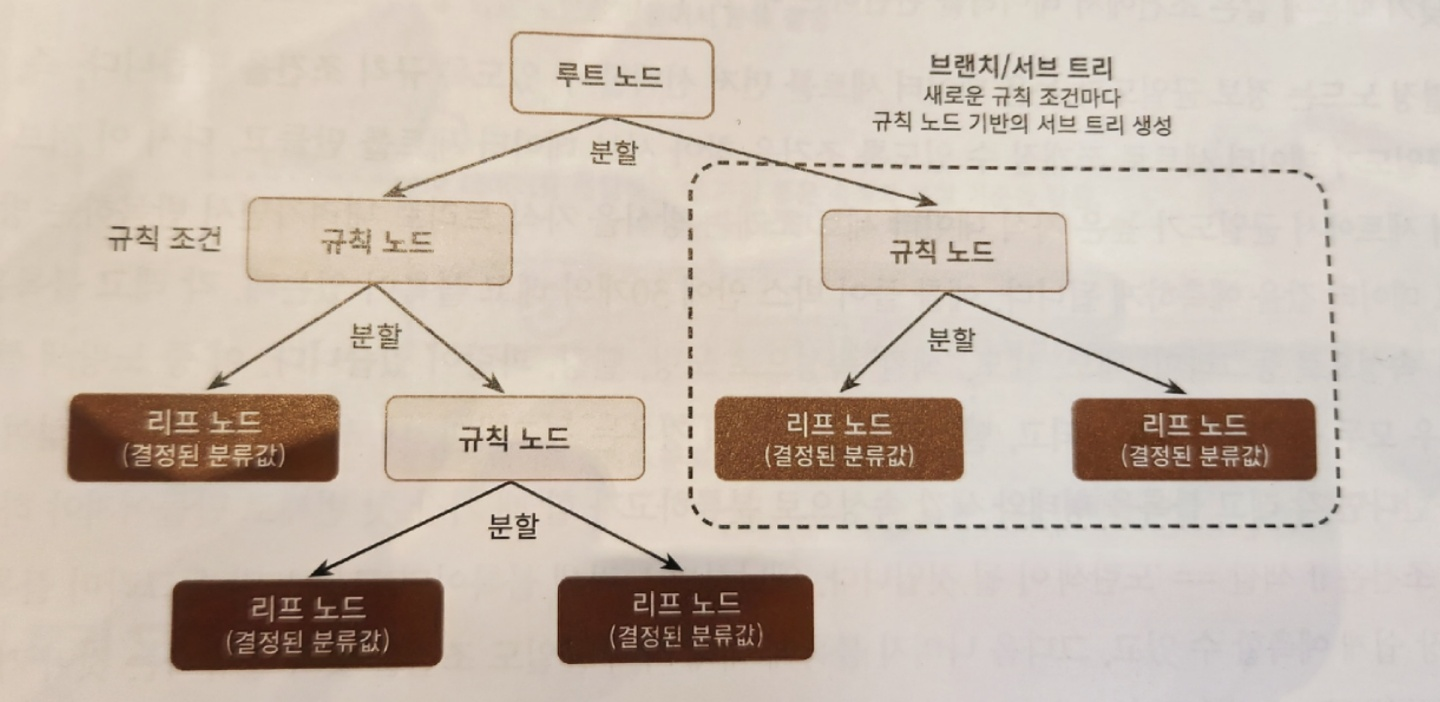

**결정 노드**는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.  
블록을 찾고자 가정했을 때,  다양한 색과 모양이 있는 블록 중 노랑색 동그라미 블록을 찾고자 한다면 if 색깔 == "노란색", if 모양 == "동그라미" 등의 조건을 만들어 균일도 조건을 찾아 분류한다.

정보의 균일도를 측정하는 대표적인 방법으로 엔트로피를 이용한 **정보 이득(Infomation Gain) 지수**와 **지니 계수**가 있다.  
- **정보 이득**은 엔트로피라는 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미한다. **서로 다른 값이 섞여 있으면** 엔트로피가 높고, **같은 값이 섞여 있으면** 엔트로피가 낮다. **정보 이득 지수**는 1에서 엔트로피 지수를 뺀 값이다. 즉, 1 - 엔트로피 지수 이다.  
-**지니 계수**는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수다. 머신러닝에 적용될 때는 **지니 계수가 낮을수록 데이터 균일도가 높은 것**으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

### 결정 트리 모델의 특징  
- **장점**  
 - 정보의 '균일도'라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적  
 - 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다.  
- **단점**  
 - 과적합으로 정확도가 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요.

### 결정 트리 파라미터  
사이킷런의 결정 트리 구현은 CART(Classification And Regression Tree) 알고리즘 기반이다. 여기서는 분류를 위한 DeicisionTreeRegressor 클래스만 다루겠다. DecisionTreeClassifier과 DecisionTreeRegressor 모두 파라미터는 다음가 같이 동일한 파라미터를 사용한다.  
- min_samples_split  
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가.
 - 과적합 제어. 1로 설정할 경우 분할되는 노드가 많아져 과적합 가능성 증가  
-min_samples_leaf  
 - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수  
 - Min_samples_split와 유사하게 과적합 제어 용도, 그러나 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요  
- max_features  
 - 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 수행.
 - int 형으로 지정하면 대상 피처의 개수,float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트.
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수), 즉 $ \sqrt {전체 피처 개수} $ 만큼 선정
 -'auto'fh wlwjdgkaus sqrt와 동일
 -'log'는 전페 피처 중 log2(전체 피처 개수) 선정
 -'None'은 전체 피처 선정  
- max_depth  
 - 트리의 최대 깊이 규정
 - 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이 증가.
 - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.
- max_leaf_nodes 
 - 말단 노드(Leaf)의 최대 개수 

### 결정 트리 모델의 시각화  
시각적으로 보여줄 수 있는 방법으로 Graphviz 패키지 사용이 있다. (https://www.graphviz.org)  <br>
사이킷런은 이러한 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공한다. <br>
사이킷런의 export_graphviz()는 함수 인자로 학습 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여준다.  

붓꽃 데이터를 이 DecisionTreeClassifier를 이용해 학습한 뒤 어떠한 형태로 규칙 트리가 만들어지는지 확인해 보겠다.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                   test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)

이렇게 생성된 출력 파일 'tree.dot'을 다음과 같이 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있다.

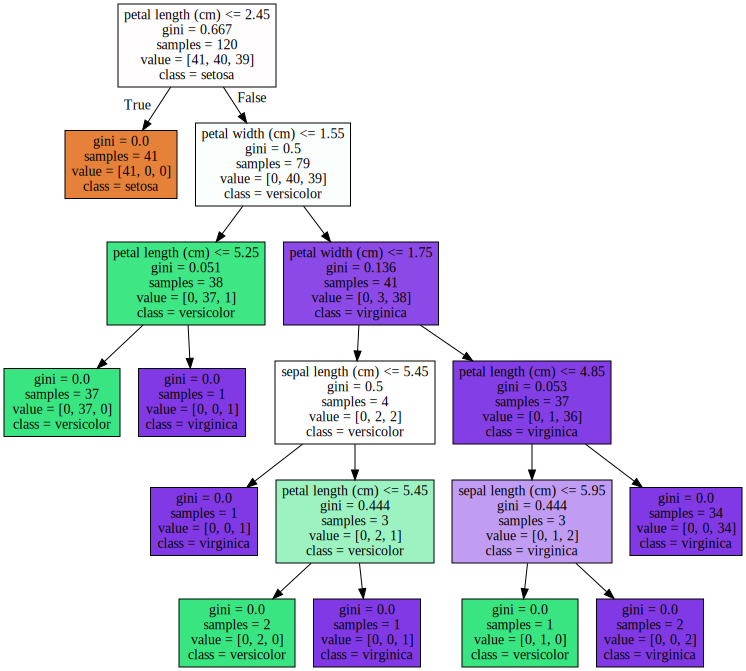

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북에서 시각화
with open("tree.dot")as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프 노드다.
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수다.
- samples는 현 규칙에 해당하는 데이터 건수다.
- value = []는 클래스 값 기반의 데이터 건수다. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며, setosa, 1 : Versicolor, 2 : Virginica 품종을 가리킨다. 만일 value = [41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Vesicolor  40개, Virginica 39개로 데이터가 구성돼 있다는 의미다.

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다. 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미다. 

마지막으로 **min_samples_leaf** 하이퍼 파라미터 변경에 따른 결정 트리의 변화를 살펴보겠다. 더 이상 자식 노드가 없는 리프 노드는 클래스 결정 값이 되는데, **min_samples_leaf는 이 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정한다.**  <br>
min_samples_leaf의 값을 키우면 더 이상 분할하지 않고, 리프 노드가 될 수 있는 조건이 완화된다. 즉, min_samples_leaf <= 지정 값 기준만 만족하면 리프 노드가 될 수 있다. 

**결정 트리**는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 중요한 몇 개의 피처가 명확한 트리 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있기 때문이다. <br>
사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **feature_importances_** 속성으로 제공한다. <br>
<br>
feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당된다. 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것이다. 예외 사항이 있지만, 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미다. <br>
<br>
붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서 중요도를 추출해 보겠다.  

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

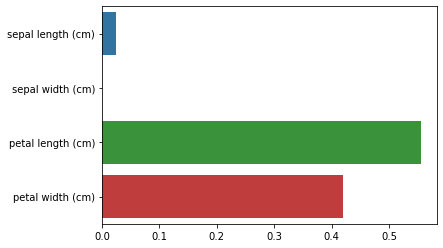

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

#feature importace를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)

피처 중 petal_length가 가장 피처 중요도가 높음을 알 수 있다.

### 결정 트리 과적합(Overfitting)  
결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보겠다.  <br>
먼저 분류를 위한 데이터 세트를 make_classification() 함수를 통해 임의로 만들어 보겠다.

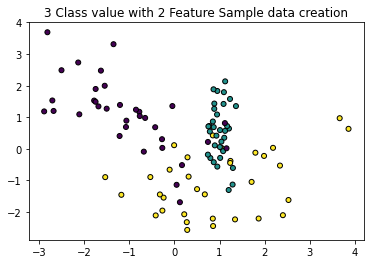

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class value with 2 Feature Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:,1], marker='o', c=y_labels, s= 25, edgecolor='k')

X,Y축으로 나열된 2차원 그래프, 3개의 클래스 값 구분은 색깔.

이제 X_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습하겠다.  
첫 번째 학습 시에 **결정 트리 생성에 별다른 제약이 없도록** 결정 트리의 하이퍼 파라미터를 디폴트 한 후,  
결정 트리 모델이 어떠한 기준을 가지고 분할하면서 데이터를 분류하는지 확인 할 것이다. 이를 위해 visualize_boundary() 생성.  
<br>
먼저 결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifer를 학습하고 결정 기준 경계를 시각화해 보겠다.

In [6]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


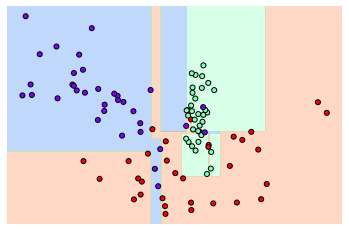

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화  
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

**일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다.**  
결정 트리의 기본 하이퍼 파라미터 설정은 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다.  
복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 **예측 정확도가 떨어지게 된다.**

**이번엔 min_samples_leaf = 6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 뒤** <br>
하이퍼 파라미터를 변경해 어떻게 결정 기준 경계가 변하는지 살펴보겠다. <br>
- min_samples_leaf : 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수

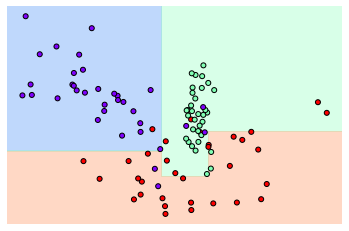

In [8]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있다.  
첫 번째 모델보다는 min_samples_leaf=6으로 트리 생성 조건을 제약한 모델이 학습 데이터에만 지나치게 최적화되지 않았으므로  
더 뛰어날 가능성이 높다.

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트  
이번엔 결정 트리를 이용해 UCI 머신러닝 리포지토리(Machine Learning Repository)에서 제공하는 <br>
사용자 행동 인식(Human Activity Recognition) 데이터 세트에 대한 예측 분류를 수행하겠다.  
-> https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones <br>
30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터  
-> 수집된 피처 세트를 기반으로 어떠한 동작인지 예측

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DateFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출.
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명을 보면 인체의 움직임과 관련된 속성의 평균 / 표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있다.  
여기서 유의해야 할 부분은 위에서 피처명을 가지고 있는 **features.txt 파일은 중복된 피처명**을 가지고 있다.  
따라서 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 추가로 부여해 변경한 뒤 이를 이용하여 데이터를 DateFrame하겠다.

In [56]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

총 42개가 중복돼있다. 이를 수정하고 새로운 피처명을 가지는 DateFrame을 반환하는 함수인 get_new_feature_name_df()를 생성하겠다.

In [57]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                             'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                               if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

이제 train 디렉터리와 test 디렉터리에 있는 학습용 피처 데이터 세트, 파일과 레이블 데이터 세트, 파일을 각각 학습 / 테스트용  
DataFrame에 로드해 보겠다.  
<br>
해당 데이터 세트는 이후 다른 예제에서도 자주 사용되므로 이 DataFrame을 생성하는 로직을 간단한 함수로 생성하겠다.  
함수명은 get_human_dataset()이다. 앞에서 생성한 get_new_feature_name_df()는 get_human_dataset() 내에서 적용돼 중복된 피처명을  
새로운 피처명으로 할당한다.

In [58]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+',  names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train =pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    #로드된 학습/테스트용 DataFrame을 모두 변환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [59]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


학습 데이터 세트는7352개의 레코드로 561개의 피처를 가지고 있다.  
피처가 전부 float 형의 숫자 형이므로 별도의 인코딩은 수행할 필요가 없다.  
레이블 값은 1, 2, 3, 4, 5, 6의 6개 값이고 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포돼 있다.

In [60]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


사이킷런의 DecisitionTreeClassifier를 이용해 동작 예측 분류를 수행하겠다.  

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도추릉ㄹ 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisitionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params()) 
# P.205

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


약 85.48%의 정확도를 나타낸다.  
<br>
이번에는 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴보겠다.  
GridSearchCV를 이용해 **사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능을 확인**하겠다.   
교차 검증은 5개 세트다.


In [62]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8일 때 5개의 폴드 세트의 최고 평균 정확도 결과가 약 85.49%로 도출됐다.  
이 **예제의 수행 목표**는 max_depth 값의 증가에 따라 예측 성능이 어떻게 변했는지 확인하는 것이 우선이다.  
max_depth에 따른 평가 데이터 세트의 평균 정확도 수치를 cv_result_에서 추출해 보겠다.

In [63]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

param_max_depth  mean_test_score
0               6         0.847662
1               8         0.854879
2              10         0.852705
3              12         0.845768
4              16         0.847127
5              20         0.848624
6              24         0.848624

mean_test_score는 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치다. 
<br>
결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 된다.  <br>
깊어진 트리는 학습 데이터 세트에서 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발하게 된다.  
<br>


이번엔 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정하겠다.  
별도의 테스트 데이터 세트에서 min_samples_split은 16으로 고정하고 max_depth의 변화에 따른 값을 측정하겠다.  

In [14]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8551
max_depth = 8 정확도 : 0.8717
max_depth = 10 정확도 : 0.8599
max_depth = 12 정확도 : 0.8571
max_depth = 16 정확도 : 0.8599
max_depth = 20 정확도 : 0.8565
max_depth = 24 정확도 : 0.8565


max_depth가 8일 경우 약 87.17%로 가장 높은 정확도를 나타냈다.  
하지만 **결정트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 한다.**   
max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝하겠다.  

In [15]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf,param_grid=params, scoring='accuracy', cv= 5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8, min_samples_split이 16일 때 가장 최고의 정확도로 약 85.49%를 나타낸다.  
앞 예제를 이용해 별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터를 적용해 보겠다.

In [16]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


max_depth 8, min_samples_split 16일 때 테스트 데이터 세트의 예측 정확도는 약 87.17%다.  
<br>
마지막으로 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해 알아보겠다.

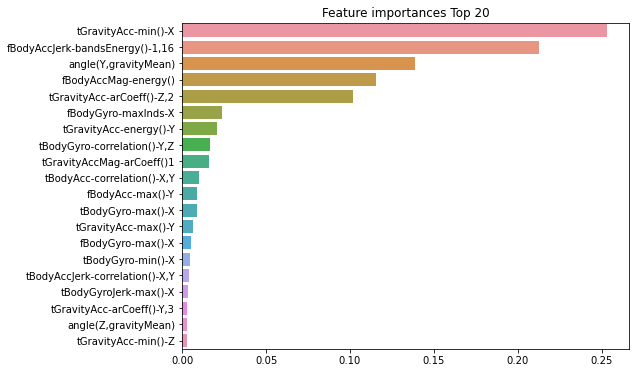

In [17]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index= X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y =ftr_top20.index)
plt.show()

## 앙상블 학습  
### 앙상블 학습 개요  
**앙상블 학습을 통한 분류**는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법이다.   
<br>
**앙상블 학습의 유형**은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며 이 외 다양한 방법이 있다.  
<br>
**앙상블 부스팅**
- 앞에서 예측한 분류기가 틀린 부분에 있어 **가중치**를 부여한다. -> 틀린 부분 더 잘 맞추는 기능  
- 배깅과 유사하게 초기 샘플 데이터를 뽑아내고 다수의 분류기를 생성한다는 것에서 상당히 비슷하지만, 훈련 과정에서 앞 모델이 틀렸던 부분을 가중치를 부여하며 진행한다는 것이 다르다.  
<br>
**보팅**과 **배깅**은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다.  
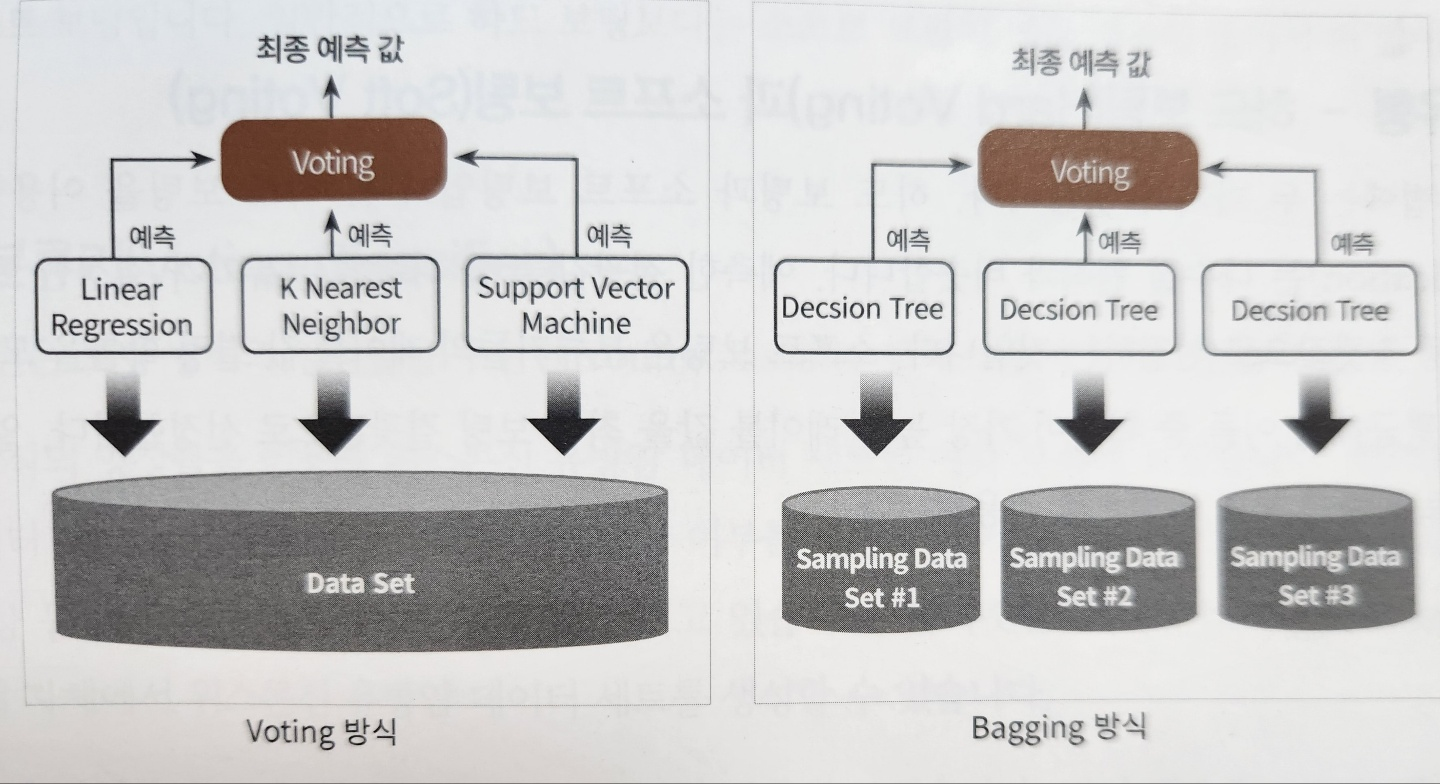

**보팅 분류기**  
- **선형 회귀, K 최근접 이웃, 서포트 벡터 머신의 ML 알고리즘**이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정.  
<br>

**배깅 분류기**   
- 부트스트래핑(Bootstrapping) : **개별 분류기에 할당된 학습 데이터**는 원본 학습 데이터를 샘플링해 추출한다.
- 배깅 앙상블 : 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식 

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Votting)  
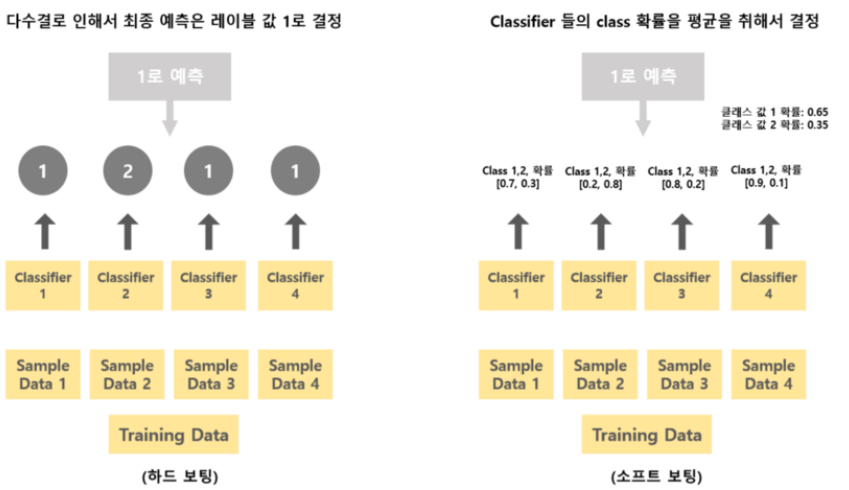
**하드 보팅**  
- 분류기 1번, 3번, 4번이 1로 레이블 값 예측, 분류기 2번이 2로 레이블 값 예측 => **다수결 원칙**에 따라 최종 예측은 레이블 값 1  
<br>
**소프트 보팅**
- **각 분류기의 레이블 값 예측 확률을 평균 내어 최종 결정.**
- 레이블 값 1의 평균 예측 확률 = (0.7 + 0.2 + 0.8 + 0.9) / 4 = 0.65, 레이블 값 2의 평균 예측 확률 = (0.3 + 0.8 + 0.2 + 0.1) / 4 = 0.35   <br>--> 레이블 값 1로 최종 보팅

### 보팅 분류기 (Voting Classifier)  
사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공한다.  
<br>
보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석해 보겠다.  
로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어 보겠다.

In [18]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들어 보겠다.  


In [19]:
# 개별 모델은 로지스틱 회귀와 NKK임
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=156)

# VotingClassifer 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


보팅 분류기가 정확도가 조금 높게 나왔는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다.

## 랜덤 포레스트 
**배깅(bagging)**은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘으로,  
배깅의 대표적인 알고리즘은 **랜덤 포레스트**다.  
랜덤 포레스트는 앙상블 알고리즘 중 **비교적 빠른 수행 속도**를 가지고 있으며, **다양한 영역에서 높은 예측 성능**을 보이고 있다.  
<br>
랜던 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로  
학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.  
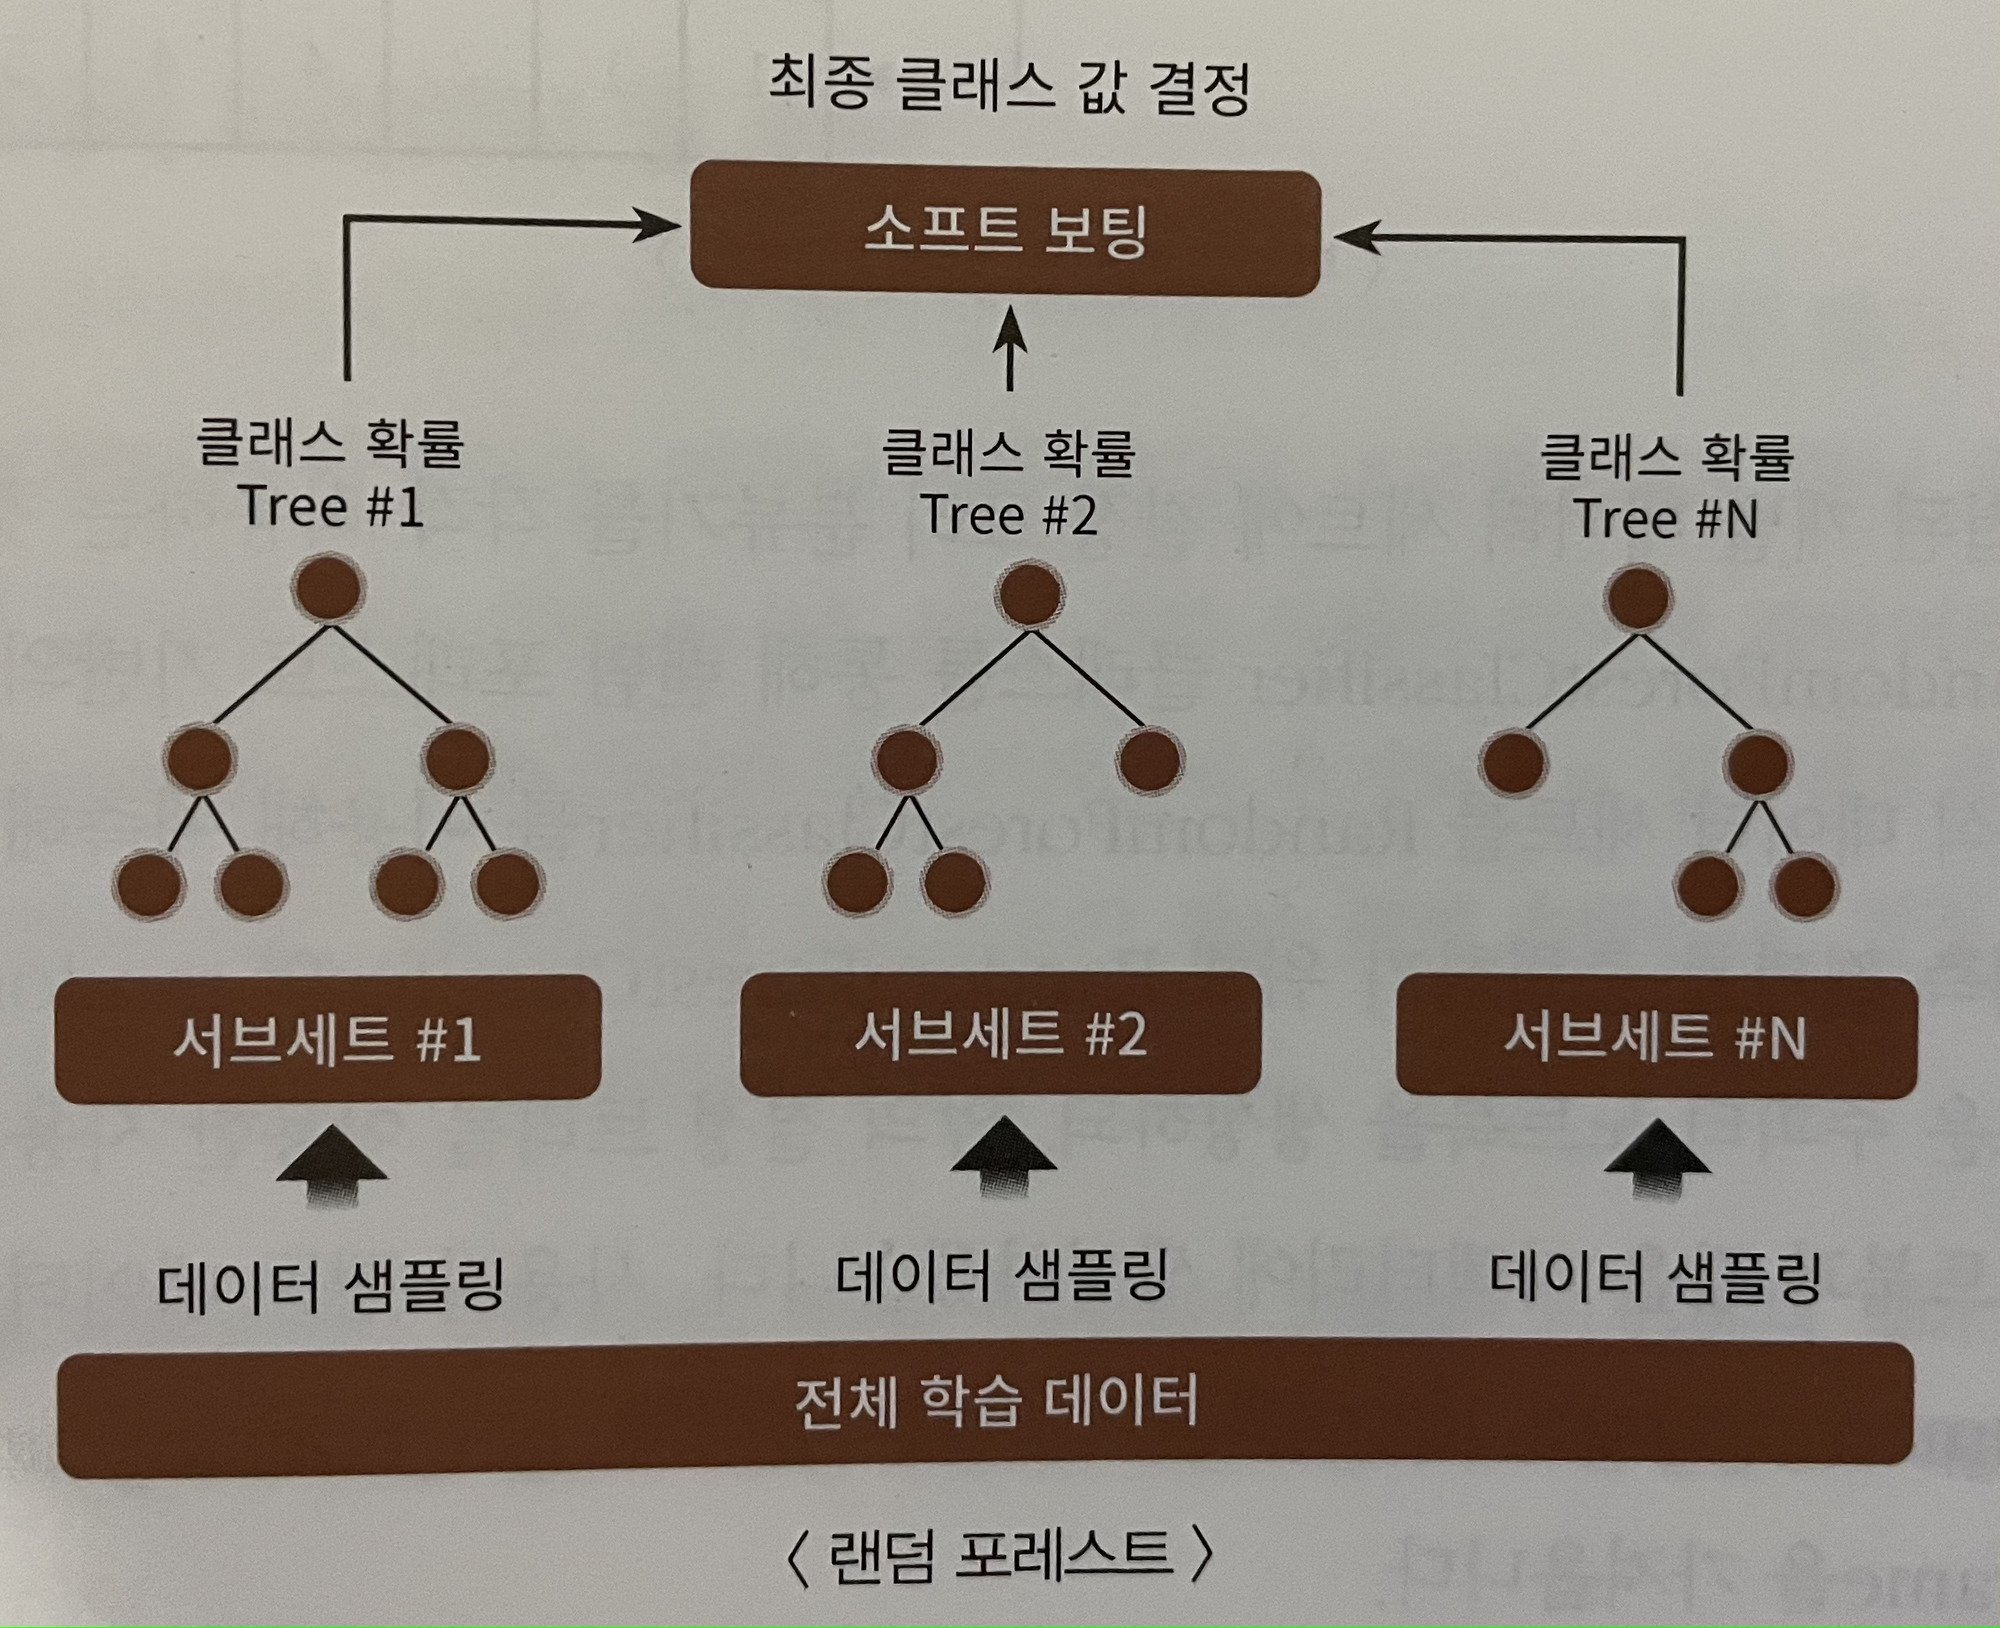

개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트다.  
이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 **부트스트래핑(bootstrapping) 분할 방식**이라고 한다.

In [22]:
# p.218
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy =accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9196


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split': [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridsearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 : 0.9165


In [24]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                               min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9260


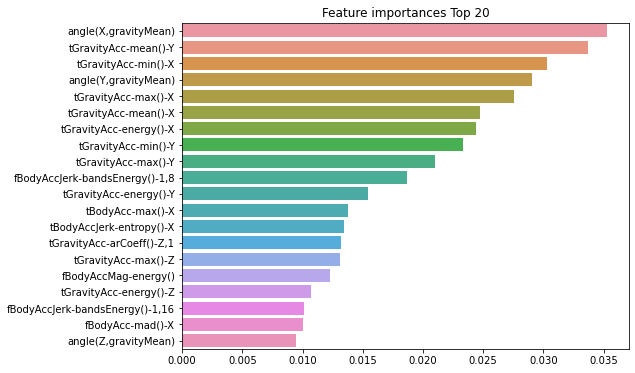

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

### GBM의 개요 및 실습 
**부스팅 알고리즘** : 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여를 통해  
오류를 개선해 나가면서 학습하는 방식. 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있다.  
<br>  
- 에이다 부스트 : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘.
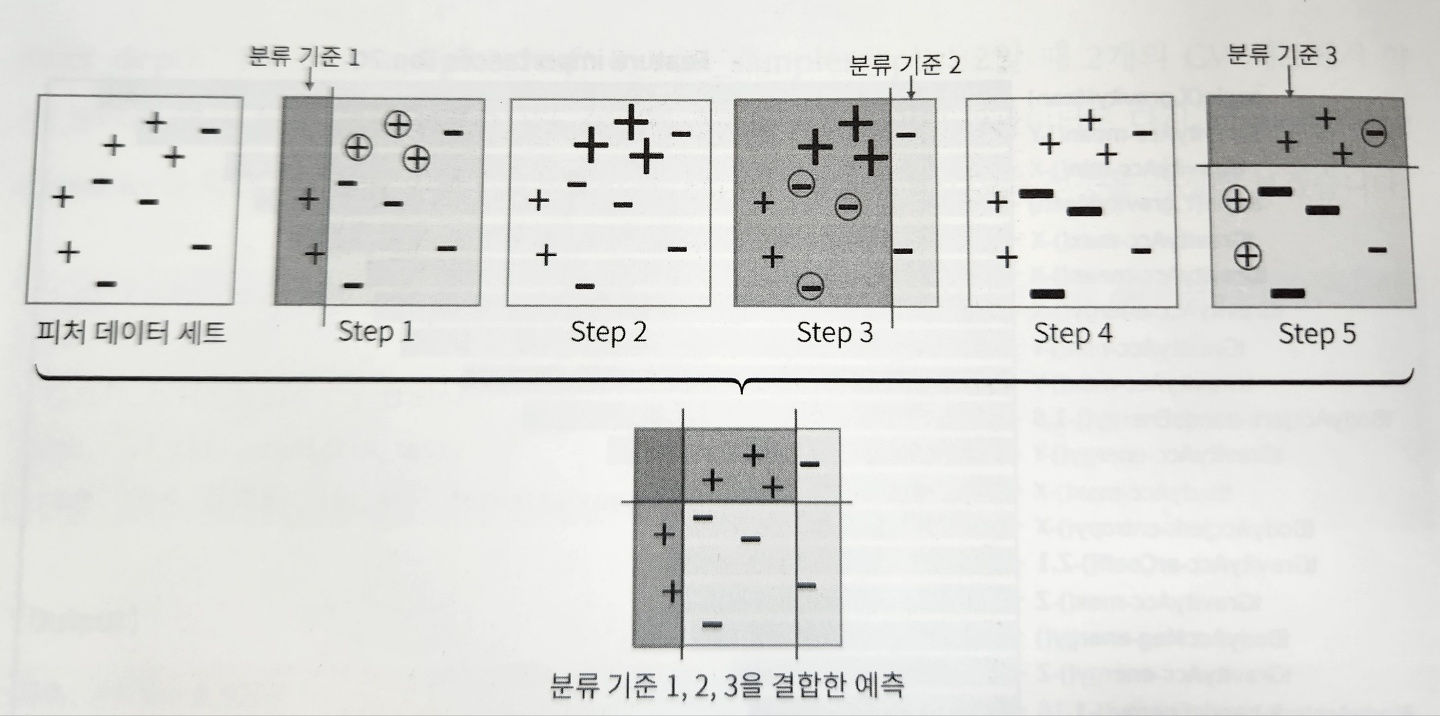  
 - Step 1 : 첫 번째 약한 학습지(weak learner)가 분류 기준 1로 +와 -를 분류한 것.동그라미로 표시된 것은 오류 데이터.  
 - Step 2 : 오류 데이터에 대해서 가중치 값 부여. 크기 증가.
 - Step 3 : 두 번째 약한 학습기가 분류 기준 2로 +와 -를 분류. 동그라미로 표시된 것은 오류 데이터.  
 - Step 4 : 오류 데이터에 대해서 가중치 값 부여. 크기 증가.  
 - Step 5 : 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터 찾기. 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측 수행.  
 - 맨 아래에는 첫 번째, 두 번째, 세 번째 약한 학습기를 모두 결합한 결과 예측이다. 개별 약한 학습기보다 훨씬 정확도가 높아졌다.  

**GBM(Gradienet Boost Machine)**도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Decent)을 이용하는 것이 큰 차이다.  
<br>
**경사 하강법(Gradient Decent)** : 오류식을 최소화하는 뱡항성을 가지고 반복적으로 가중치 값을 업데이트하는 것.
 - 오류식 : h(x) = y - F(x)  
 - 피처 : x1, x2, ... , xn  
 - 결괏값 : y  
 

**GBM**은 분류는 물론, 회귀도 가능하다. 사이킷럿은 GBM 기반의 분류를 위해서 GradientBoostingClassifier 클래스를 제공한다.  
이를 이용해 사용자 행동 데이터 세트를 예측 분류해 보겠다.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:1f}초'.format(time.time()- start_time))

GBM 정확도 : 0.9389
GBM 수행 시간 : 1086.713342초


기본 하이퍼 파라미터만으로 93.89%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냈다.  
일반적으로 GBM이 예측 성능이 좀 더 뛰어난 경우가 많지만,  수행시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요하다.  
사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을  
사용하더라도 병렬 처리가 지원되지 안하서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요하다.  

### GBM 하이퍼 파라미터 소개
- loss : 경사 하강법에서 사용할 비용 함수를 지정한다. 특별한 이유가 없다면 기본값인 'deviance'를 그대로 적용한다.
<br>  

- learning _rate : GBM이 학습을 진핼할 때마다 적용하는 학습률이다. **weak learner**가 순차적으로 오류 값을 보정해 가는 데 적용하는 계수다.<br>0~1 사이의 값을 지정할 수 있으며 기본값은 0.1이다. <br>**너무 작은 값**을 적용하면 예측 성능이 높아질 가능성은 있지만 수행 시간이 오래 걸리고 최소 오류 값을 찾지 못할 수 있다. <br>**큰 값**을 적용하면 최소 오류 값을 찾지 못하고 그낭 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능하다.  <br>  <br>
  
- n_estimtors : weak learner의 개수다. 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있으나 수행 시간이 오래 걸린다. 기본값은 100이다.  <br>  
  <br>
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율이다. 기분값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미다. 

## XGBoost(eXtra Gradient Boot)
### XGBoost 개요
XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결해서 매우 각광받고 있다.  
자세한 장점은 다음과 같다.  
- 뛰어난 예측 성능 : 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능 발휘.
- GBM 대비 빠른 수행 시간 : 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능 보장. 
- 과적합 규제 : 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성.
- Tree prunung : 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점.
- 자체 내장된 교차 검증 : 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있다.지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있다.
- 결손값 자체 처리 : 결손값을 자체 처리할 수 있는 기능을 가지고 있다. 

### XGBoost 설치하기
1. 아나콘다 Command 창 열기 ( 관리자 권한 실행)
2. conda install -c anaconda py-xgboost
3. 명령어를 입력 후 Proceed([y]/n)?에서 y를 입력하면 설치 시작.

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier

### 파이썬 래퍼 XGBoost 하이퍼 파라미터
파이썬 래퍼 XGBoost 하이퍼 파라미터를 유형별로 나누면 다음과 같다.  
- 일반 파라미터 : 일반적으로 실행 시 스레드의 개수나 slient 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없다.  
<br>  
- 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭한다.   
<br>  

- 학습 태스크 파라미터 : 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터다.  
<br>  

#### 주요 일반 파라미터  
- booster : gbree(tree based model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree다.  
<br>

- slient : 디폴트는 0이며, 출력 메세지를 나타내고 싶지 않을 경우 1로 설정한다.  
<br>  
- nthread : CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용하는 것이다. 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경한다.  
<br>  

####  주요 부스터 파라미터  
- eta [ default = 0.3, alias : learning_rate] : GBM의 학습률과 같은 파라미터다. 0~1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값.  
<br>  

- num_boost_rounds : GBM의 n_estimators와 같은 파라미터다.  
<br>  

- min_child_weight[default = 1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합.(= 과적합 조절)  
<br>  

- gamma [default=0, alias : min_split_loss] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값이다. 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리한다. 값이 클수록 과적합 감소 효과가 있다.  
<br>  

- max_depth[default=6] : GBM의 subsample과 동일하다. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다.  
<br>
- colsample_bytree[default=1] : GBM의 max_features와 유사하다. 트리 생성에 필요한 피처(칼럼)을 임의로 샘플링하는 데 사용된다. 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용된다.  
<br>
- lambda [default=1, alias : reg_lambda] : L2 Regularization 적용 값이다. 피처 개수가 많은 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.  
<br>
- alpha [default=0, alias : reg_alpha] : L1 Regularization 적용 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
<br>
- scale_pos_weight [default=1] : 특정 값으로 치우진 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터다.  
<br>

#### 학습 태스크 파라미터  
- objective : 최솟값을 가져야 할 함수를 정의한다. XGBoost는 많은 유형의 손실함수를 사용할 수 있다.  
<br>

- binary:logistic : 이진 분류일 때 적용한다.  
<br>

- multi:softmax : 다중 분류일 때 적용한다. 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 한다.  
<br>

- multi:softprob : multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환한다.  
<br>

- eval_metric : 검증에 사용되는 함수를 정의한다. 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error다. 다음은 eval_metric의 값 유형이다.
 - rmse : Root Mean Square Error  
 - mae : Mean Absolute Error  
 - logloss : Negative log-likelihood  
 - error : Binary classification error rate  
 - merror : Multiclass classification error rate  
 - mlogloss : Multiclass logloss  
 - auc : Area under the curve

과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있다.  
- eta 값을 낮춘다(0.01~0.1). eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여줘야 한다.  
<br>
- max_depth 값을 낮춘다.  
<br>
- min_chlid_weight 값을 높인다.  
<br>
- gamma 값을 높인다.  
<br>
- 또한 subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있다.

In [28]:
import xgboost
print(xgboost.__version__)

1.5.0


### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측  
위스콘신 유방암 데이터를 활용하여 파이썬 래퍼 XGBoost API의 사용법을 살펴보겠다.  
위스콘신 유방암 데이터는 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignan)인지 양성 종양(benign)인지를 분류한 데이터 세트다.  

In [29]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data = features, columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

레이블 값의 분포를 확인해 보겠다.

In [75]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


위스콘신 유방암 데이터 세트의 80%를 학습용으로, 20%를 테스트용으로 추출한 뒤 80%의 학습용 데이터에서 90%를 최종 학습용,  
10%를 검증용으로 분할하겠다.  
<br>
여기서 검증용 데이터 세트를 별도로 분할하는 이유는 XGBoost가 제공하는 기능인 검증 성능 평가와 조기 중단(early stopping)을 수행해 보기 위함이다.

In [76]:
#cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2,
                                                   random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val =train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)
# p.234

(455, 30) (114, 30)
(409, 30) (46, 30)


In [77]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.value로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data = X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [78]:
params = {'max_depth' : 3,
         'eta' : 0.05,
         'objective':'binary:logistic',
         'eval_metric' : 'logloss'
         }

num_rounds = 400

In [79]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달.
xgb_model = xgb.train(params = params, dtrain =dtr, num_boost_round=num_rounds, \
                     early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086


In [80]:
pred_probs = xgb_model.predict(dtest)
print('predcit() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨.')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 : ', preds[:10])

predcit() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨.
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [81]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨.')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 pred에 저장.
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 : ', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨.
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

#수정된 get_clf_eval()함수
def get_clf_eval(y_test, pred=None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print 추가
    print(f'정확도: {accuracy:.4f}, 정밀도:{precision:.4f}, 재현률: {recall:.4f},\
    F1: {f1:.4f}, AUC:{roc_auc:.4f}')

## 사이킷런 래퍼 XGBoost의 개요 및 적용

In [83]:
# 사이키런 래퍼 XGboost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth= 3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [84]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도:0.9620, 재현률: 0.9870,    F1: 0.9744, AUC:0.9954


In [85]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth = 3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

[130]	validation_0-logloss:0.01886	validation_1-logloss:0.25712
[131]	validation_0-logloss:0.01863	validation_1-logloss:0.25609
[132]	validation_0-logloss:0.01839	validation_1-logloss:0.25649
[133]	validation_0-logloss:0.01816	validation_1-logloss:0.25789
[134]	validation_0-logloss:0.01802	validation_1-logloss:0.25811
[135]	validation_0-logloss:0.01785	validation_1-logloss:0.25794
[136]	validation_0-logloss:0.01763	validation_1-logloss:0.25876
[137]	validation_0-logloss:0.01748	validation_1-logloss:0.25884
[138]	validation_0-logloss:0.01732	validation_1-logloss:0.25867
[139]	validation_0-logloss:0.01719	validation_1-logloss:0.25876
[140]	validation_0-logloss:0.01696	validation_1-logloss:0.25987
[141]	validation_0-logloss:0.01681	validation_1-logloss:0.25960
[142]	validation_0-logloss:0.01669	validation_1-logloss:0.25982
[143]	validation_0-logloss:0.01656	validation_1-logloss:0.25992
[144]	validation_0-logloss:0.01638	validation_1-logloss:0.26035
[145]	validation_0-logloss:0.01623	valid

In [86]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도:0.9615, 재현률: 0.9740,    F1: 0.9677, AUC:0.9933


In [87]:
# early_stopping_round를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric = "logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

## LightGBM

위스콘신 유방암 데이 세트를 이용해 LightGBM으로 예측해 보겠다.
LightGBM도 XGBoost와 동일하게 **조기 중단**이 가능하다.

In [88]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

#위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr,y_val= train_test_split(X_train, y_train,test_size=0.1, random_state=156)

#앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

#LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr),(X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss",eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

조기 중단으로 111번 반복까지만 수행하고 학습을 종료했다.  
학습된 LightGBM 모델을 기반으로 예측 성능을 평가해 보겠다.

In [89]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도:0.9615, 재현률: 0.9740,    F1: 0.9677, AUC:0.9877


정확도가 약 95.61%다.  
<br>
LigtGBM 파이썬 패키지인 lightgbm은 XGBoost 파이썬 패키지인 xgboost와 동일하게 피처 중요도를 시각화할 수 있는 내장 API를 제공한다.  


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

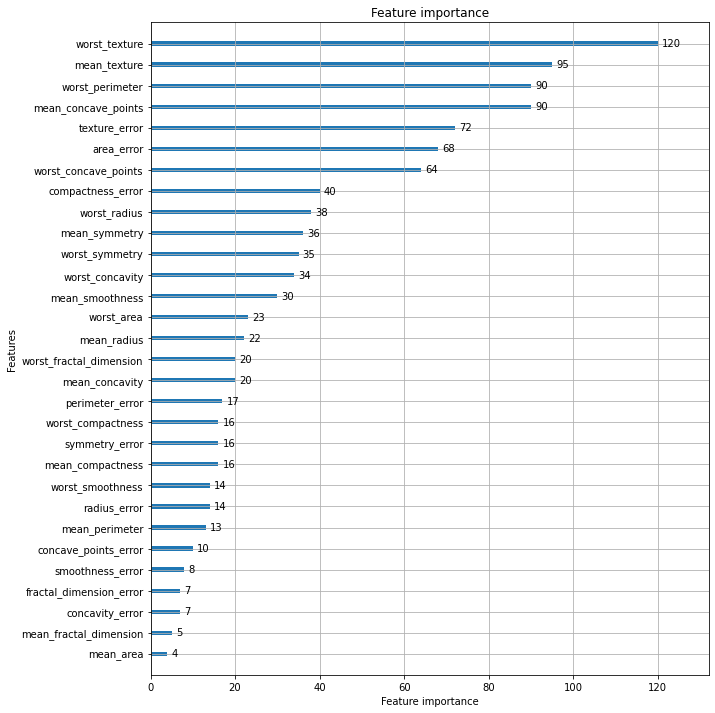

In [90]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax= ax)

## 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

지금까지 Grid Search 방식을 적용했다. 이 방식은 주요한 단점이 있는데, 튜닝해야 할 하이퍼 파라미터 개수가 많을 경우 최적화 수행 시간이  
너무 오래 걸린다는 것이다.  
XGBoost나 LightGBM은 성능이 매우 뛰어난 알고리즘이지만, **하이퍼 파라미터 개수가 다른 알고리즘에 비해 많다.**  
때문에 실무의 대용량 학습 데이터에 Grid Search 방식으로 최적 하이퍼 파라미터를 찾으려면 많은 시간이 소모될 수 있다.  
<br>  

In [94]:
params = {
    'max_depth' = [10, 20, 30, 40, 50], 'num_leaves' = [35,45,55,65],
    'colsample_bytree' = [0.5, 0.6,0.7, 0.8, 0.9], 'subsample' = [0.5,0.6,0.7,0.8,0.9],
    'min_child_weight' = [10,20,30,40], reg_alpha=[0.01, 0.05, 0.1]
}

SyntaxError: invalid syntax (Temp/ipykernel_11168/1632107205.py, line 2)

위와 같이 6가지 하이퍼 파라미터를 최적화하려는 시도를 한다고 가정했을 때, 5 * 4 * 5 * 5 * 4 * 3 = 6000회에 걸쳐 반복적으로  
학습과 평가를 수행해야만 하기에 수행 시간이 매우 오래 걸릴 수밖에 없다.  
<br>
이렇게 XGBoost나 LightGBM에 Grid Search를 적용할 경우 기하급수적으로 늘어나는 하이퍼 파라미터 최적화 시간 때문에 어쩔 수 없이  
하이퍼 파라미터 개수를 줄이거나 개별 하이퍼 파라미터의 범위를 줄여야 한다.  
두 모델 모두 하이퍼 파라미터 튜닝이 없어도 높은 모델 성능을 보장해 주기는 하지만 실무의 대용량 학습 데이터에서는 아쉬운 상황이다.  
이 때, **베이지안 최적화 기법*을 사용한다.

### 베이지안 최적화 개요  
**베이지안 최적화**  
- 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식이다.  
- 베이지안 확률에 기반을 두고 있는 최적화 기법이다. 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어 낸다.  
- 베이지안 최적화 구성 요소  
 - 대체 모델 : 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나간다.  
 - 획득 함수 : 개선된 대체 모델을 기반으로 최적 입력값 계산.

### 베이지안 최적화 과정  
1. 최초에 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과 예측.  
2. 관측된 값을 기반으로 대체 모델은 최적 함수를 추정.
3. 추정된 최적 함수를 기반으로 획득 함수는 다음으로 관측할 하이퍼 파라미터 값을 계산. 획득 함수는 이전의 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아서 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달.
4. 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측 추정.  
<br>
3과 4를 특정 횟수만큼 반복하게 되면 대체 모델의 불확실성이 개선되고 점차 정확한 최저 함수 추정이 가능하게 된다.

### HyperOpt 사용하기  
베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 여러 파이썬 패키지들이 있다.  
대표적으로 HyperOpt, Bayesian Optimization, Optuna 등을 들 수 있다.  
<br>
pip를 이용해서 HyperOpt를 설치해 보겠다.

In [93]:
pip install hyperopt


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


HyperOpt 활용하는 **주요 로직**은 아래와 같이 구성되어 있다.  
1. 입력 변수명과 입력값의 검색 공간 설정.
2. 목적 함수 설정.  
3. 목점 함수의 반환 최솟값을 가지는 최적 입력값을 유추.  

HyperOpt를 사용할 대 유의할 점은 다른 패키지와 다르게 목적 함수 반환 값의 최댓값이 아닌 최솟값을 가지는 최적 입력값을 유추한다는 것이다.
<br>
먼저 HyperOpt의 hp 모듈을 이용하여 입력 변수명과 입력값의 검색 공간을 설정해 보겠다.  
입력 변수값, 입력값 검색 공간은 파이썬 딕셔너리 형태로 설정되어야 하며, 키 값으로 입력 변수명, 밸류 값으로 해당 입력 변수의 검색 공간이 주어진다.  
hp모듈은 입력값의 검색 공간을 다양하게 설정할 수 있도록 여러가지 함수를 제공한다.  
<br>
아래 코드는 2개의 입력 변수 x,y에 대해서 입력값 검색 공간을 지정한다.

In [95]:
from hyperopt import hp

# `-10 ~ 10 까지의 1 간격을 가지는 입력 변수 y와 -15 ~ 15까지 1 간격으로 입력 변수 y 설정.
search_space = {'x':hp.quniform('x', -10, 10,1), 'y':hp.quniform('y', -15, 15, 1)}

입력값의 검색 공간을 제공하는 대표적인 함수들은 아래와 같다.  
low : 최솟값, high : 최댓값, q = 간격  
 - hp.quniform(label, low, high, q) : label로 지정된 입력값 변수 검색 공간을 최솟값에서 최댓값까지 q의 간격가지고 설정.  
 - hp.randint(label, upper) : 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정.  
 - hp.loguniform(label, low, high) : exp(uniform(low, high)값을 반환하며, 반환 값의 log 변환 된 값은 정규 분포 형태를 가지는 검색 공간 설정.  
 - hp.choice(label, options) : 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정.

다음으로 목적 함수를 생성해 보겠다.  
 - 목적 함수 구조  
  - 변숫값과 검색 공간을 가지는 딕셔너리를 인자로 받기.
  - 특정 값을 반환.  
  
목적 함수의 반환값은 숫자형 단일값 외에도 딕셔너리 형태로 반환 가능.

In [96]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

입력값의 검색 공간과 목적 함수를 설정했으면 목적 함수의 반환값이 최소가 될 수 있는 최적의 입력값을 베이지안 최적화 기법에 기반하여 찾아 줘야 한다.  
이를 위해 HyperOpt는 fmin 함수를 제공한다.  
 - fn : 위에서 생성한 objective_func와 같은 목적 함수다.
 - space : 위에서 생성한 search_space와 같은 검색 공간 딕셔너리다.  
 - algo : 베이지안 최적화 적용 알고리즘이다. 기본적으로 tpe.suggest이며 이는 HyperOpt의 기본 최적화 알고리즘인 TPE(Tree Parzen Estimator)를 의미한다.  
 - max_evals : 최적 입력값을 찾기 위한 입력값 시도 횟수.
 - trials : 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는데 사용된다. Trials 클래스를 객체로 생성한 변수명을 입력한다.  
 - rstate : fmin()을 수행할 때마다 동일 결괏값을 가질 수 있도록 설정하는 랜덤 시드 값.  
 

위에서 설정한 검색 공간인 search_space에서 목적 함수 object_func의 최솟값을 반환하는 최적 입력 변숫값을 찾을 수 있도록   
베이지안 최적화를 수행해 보겠다.

In [97]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn = objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
              trials=trial_val, rstate=np.random.default_rng(seed=0))

print('best : ', best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 208.89trial/s, best loss: -224.0]
best :  {'x': -4.0, 'y': 12.0}


best_01 변숫값을 확인하면 x = -4.0, y = 12.0으로 되어 있다. 입력 변수 x의 공간 -10 ~ 10, y의 공간 -15 ~ 15에서 목적 함수의 반환 값을  
x***2 - 20*y 로 설정했으므로 x는 0에 가까울수록 y는 15에 가까울수록 반환값이 최소로 근사될 수 있다.  
<br>  
이번에는 max_evals 값을 20으로 설정하여 20번의 수행 결과를 살펴 보겠다.

In [98]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best : ', best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 347.63trial/s, best loss: -296.0]
best :  {'x': 2.0, 'y': 15.0}


20회의 반복 시 x = 2, y = 15로 목적 함수의 최적 최솟값을 근사할 수 있는 결과를 도출했다.  
  
fmin() 함수 수행 시 인자로 들어가는 Trials 객체는 함수의 반복 수행 시마다 입력되는 변숫값들과 함수 반환값을 속성으로 가지고 있다.  
**Trials 객체의 중요 속성**은 results와 vals가 있다.  
  
이들 중 results 속성을 알아보겠다.

In [99]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss' : 함수 반환값, 'status' : 반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


Trials 객체의 vals 속성은 딕셔너리 형태로 값을 가진다.  
  
아래 예제를 통해 vals 값을 확인해 보겠다.

In [100]:
# Trials 객체의 vals 속성에 {'입력변수명' : 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


이처럼 Trials 객체의 results와 vals 속성은 HyperOpt의 fmin() 함수의 수행 시마다 최적화되는 경과를 볼 수 있는 함수 반환값과 입력 변숫값들의 정보를 제공해 준다.  
하지만 그대로 보기에는 불편한 면이 있므르로 DataFrame 형태로 값을 확인해 보겠다.

In [101]:
import pandas as pd

# result에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성..
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

x     y  losses
0   -6.0   5.0   -64.0
1   -4.0  10.0  -184.0
2    4.0  -2.0    56.0
3   -4.0  12.0  -224.0
4    9.0   1.0    61.0
5    2.0  15.0  -296.0
6   10.0   7.0   -40.0
7   -9.0 -10.0   281.0
8   -8.0   0.0    64.0
9   -0.0  -5.0   100.0
10  -0.0  -3.0    60.0
11   1.0   2.0   -39.0
12   9.0   4.0     1.0
13   6.0  10.0  -164.0
14   9.0   3.0    21.0
15   2.0   3.0   -56.0
16  -2.0 -14.0   284.0
17  -4.0  -8.0   176.0
18   7.0  11.0  -171.0
19  -0.0  -0.0     0.0

### HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화  
**주의사항**  
 - 특정 하이퍼 파라미터들은 정숫값만 입력을 받는데, HyperOpt는 입력값과 반환 값이 모두 실수형이기 때문에 하이퍼 파라미터 입력시 형변환.  
 - HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 성능 값이 클수록 좋은 성능 지표일 경우 -1을 곱해 줘야 한다.

In [102]:
# 전체 데이터 중 80%의 학습용 데이터, 20%의 테스트용 데이터 추출
X_train, x_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

정수형 파라미터를 hp.quniform()을 사용하고 , learning_rate와 colsample_bytree는 hp.uniform()을 사용해 보겠다.

In [108]:
from hyperopt import hp

# max_depth는 5에서 20까지 1 간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5~1 사이, learning_rate는 0.01~0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth' : hp.quniform('max_depth', 5, 20, 1),
                   'min_child_weight' : hp.quniform('min_child_weight',1, 2, 1),
                   'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2),
                   'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
                   }

다음으로 목적 함수를 설정해 보겠다.하이퍼 파라미터 튜닝을 위한 목적 함수는 검색 공간에서 설정한 하이퍼 파라미터들을 입력받아서  
XGBoost를 학습하고 평가지표를 반환할 수 있도록 구성한다. 이때 유의 사항 2가지가 있다.
<br>
1) 검색 공간에서 목적 함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형 하이퍼 파라미터값으로 설정할 때, <br> 정수형으로 형변환을 해야 한다.
2) HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 정확도와 같이 값이 클수록 <br>좋은 성능 지표일 경우 -1을 곱한 뒤 반환하여, 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어 줘야 한다. 
<br>  
2) HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 정확도와 같이 값이 클수록 <br>좋은 성능 지표일 경우 -1을 곱한 뒤(fmin() 함수는 최솟값을 최적화한다) 반환하여, 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어 줘야 한다.  
<br>  
두 가지 사항에 유의하면서 목적 함수인 objective_func()를 만들어 보겠다.

In [109]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임, -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight = int(search_space['min_child_weight']),
                           learninng_rate=search_space['learning_rate'],
                           colsample_bytree=search_space['colsample_bytree'],
                           eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    #accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss': -1*np.mean(accuracy), 'status':STATUS_OK}

accuracy(평균정확도) : 교차 검증 기반  
cross_val_score() : 3개의 교차 검증 세트로 정확도를 반환.  
n_estimators : 수행 시간을 줄이기 위해 100으로 제한.


이제 fmin()을 이용해 최적 하이퍼 파라미터를 도출해 보겠다.

In [125]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn = objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수를 지정한다.
           trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best :' , best)

[22:23:05] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:05] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:05] WARNING: ..\src\learner.cc:576:                                                                            

[22:23:08] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:08] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:08] WARNING: ..\src\learner.cc:576:                                                                            

[22:23:11] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:11] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:11] WARNING: ..\src\learner.cc:576:                                                                            

[22:23:14] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:14] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:14] WARNING: ..\src\learner.cc:576:                                                                            

[22:23:17] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:17] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:17] WARNING: ..\src\learner.cc:576:                                                                            

[22:23:20] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:21] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:21] WARNING: ..\src\learner.cc:576:                                                                            

[22:23:24] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:24] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:24] WARNING: ..\src\learner.cc:576:                                                                            

[22:23:27] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:27] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "learninng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:27] WARNING: ..\src\learner.cc:576:                                                                            

fmin()으로 추출된 최적 하이퍼 파라미터를 직접 XGBClassifier에 인자로 입력하기 전에  
정수형 하이퍼 파라미터는 정수형으로, 실수형 하이퍼 파라미터는 소수점 5자리까지만 변환 후 확인해 보겠다.

In [128]:
print("colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}.format(
     round(best['colsample_bytree', 5], round(best['learning_rate'], 5),
          int(best['max_depth']), int(best['min_child_weight'])))")

SyntaxError: EOL while scanning string literal (Temp/ipykernel_11168/2363013454.py, line 1)

도출된 최적 하이퍼 파라미터들을 이용해서 XGBClassifier를 재학습한 후 성능 평가 결과를 확인해 보겠다.

In [129]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                           learning_rate=round(best['learning_rate'], 5),
                           max_depth=int(best['max_depth']),
                           min_child_weght=int(best['min_child_weight']),
                           colsample_bytree=round(best['colsample_bytree']),5
                           )
evals = [(X_tr, y_tr),(X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
               eval_set=evals, verbose_True)

preds = xgb_wraper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_11168/3426537278.py, line 6)

## 분류 실습 - 캐글 산탄데르 고객 만족 예측  
이번에는 캐글의 산탄데르 고객 만족 데이터 세트에 대해서 고객 만족 여부를 XGBoost와 LightGBM을 활용해 예측해 보겠다.  
<br>
### 데이터 전처리  
XGBoost는 사잇킷런 래퍼를 이용할 것이다. 필요한 모듈을 로딩하고 학습 데이터를 DataFrame으로 로딩한다.


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape : ', cust_df.shape)
cust_df.head(3)

dataset shape :  (76020, 371)


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3     var38  TARGET  
0                     0.0                     0.0  39205.17       0  
1                     0.0                     0.0  49278.03       0  
2                     0.0                     0.0  67333.77       0  

[3 rows x 371 columns]

In [131]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [132]:
# 전체 데이터에서 만족과 불만족의 비율 확인.
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('insatisfied 비율은 {0:.2f}'. format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
insatisfied 비율은 0.04


In [133]:
# 각 피처의 값 분포 확인
cust_df.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [134]:
# -999999를 가장 값이 많은 2로 변환, ID피처는 단순 식별자이므로 드롭.
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 카럼 위치 1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}', format(X_features.shape))

피처 데이터 shape:{0} (76020, 369)


In [135]:
# 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트 분리.
# 비대칭한 데이터 세트이므로 클래스인 Target 값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인.
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test =train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape : {0}, 테스트 세트 Shape{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape(114, 30)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [136]:
# X_train, y_train을 다시 학습 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝  
먼저 XGBoost의 학습 모델을 생성하고 예측 결과를 ROC AUC로 평가해 보겠다.

In [137]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC : {0:.4f}', format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

ValueError: Feature shape mismatch, expected: 369, got 30

p.271

이제 HyperOpt를 이용해 베이지안 최저화 기반으로 XGBoost의 하이퍼 파라미터 튜닝을 수행해 보겠다. 

In [140]:
from hyperopt import hp

# max_depth는 5 ~ 15 까지 1 간격으로, min_child_weight는 1 ~ 6 까지 1 간격으로
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01dptj 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth' : hp.quniform('max_depth', 5, 15, 1),
                   'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
                   'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 0.95),
                   'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)}

다음으로 목적 함수를 만들어 보겠다.

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1 * roc_auc 평균 값을 반환.
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_chlid_weight=int(search_space['min_child_weight']),
                           colsample_bytree=search_space['colsample_bytree'],
                           learning_rate=search_space['learning_rate'])
    # 3개 k_fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k_fold 방식 적용
    kf = KFold(n_splits=3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_indexl in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        x_tr, y_tr = X_train.iloc[tr_index], y_train[tr_index]
        x_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # ealry stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_matric="auc"),
        eval_set=[(X_tr, y_tr), (X_val, y_val)]
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1 을 곱한 뒤 반환.
    return -1 * np.mean(roc_auc_list)

이제 fmin() 함수를 호출해 max_eval = 50회만큼 반복하면서 최적의 하이퍼 파라미터를 도출해 보겠다.

In [25]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수를 지정한다.
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best :', best)

NameError: name 'xgb_search_space' is not defined

이렇게 도출된 최적 하이퍼 파라미터를 기반으로 XGBClassifier를 재학습시키고 테스트 데이터 세트에서 ROC AUC를 측정해 보겠다.

In [143]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                       max_depth = int(best['max_depth']),
                       min_child_weight=int(best['min_child_weight']),
                       colsample_bytree=round(best['colsample_bytree'],5)
                       )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC : {0:,4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83111	validation_1-auc:0.80845
[1]	validation_0-auc:0.83656	validation_1-auc:0.80891
[2]	validation_0-auc:0.84563	validation_1-auc:0.81081
[3]	validation_0-auc:0.84910	validation_1-auc:0.81113
[4]	validation_0-auc:0.85458	validation_1-auc:0.81203
[5]	validation_0-auc:0.85715	validation_1-auc:0.81315
[6]	validation_0-auc:0.85811	validation_1-auc:0.81358
[7]	validation_0-auc:0.86083	validation_1-auc:0.81504
[8]	validation_0-auc:0.86199	validation_1-auc:0.81554
[9]	validation_0-auc:0.86104	validation_1-auc:0.81418
[10]	validation_0-auc:0.85999	validation_1-auc:0.81331
[11]	validation_0-auc:0.86246	validation_1-auc:0.81379
[12]	validation_0-auc:0.86433	validation_1-auc:0.81493
[13]	validation_0-auc:0.86837	validation_1-auc:0.81684
[14]	validation_0-auc:0.86941	validation_1-auc:0.81816
[15]	validation_0-auc:0.87189	validation_1-auc:0.81950
[16]	validation_0-auc:0.87464	validation_1-auc:0.82016
[17]	validation_0-auc:0.87685	validation_1-auc:0.82039
[18]	validation_0-au

[149]	validation_0-auc:0.96611	validation_1-auc:0.82674
[150]	validation_0-auc:0.96629	validation_1-auc:0.82670
[151]	validation_0-auc:0.96636	validation_1-auc:0.82661
[152]	validation_0-auc:0.96654	validation_1-auc:0.82656
[153]	validation_0-auc:0.96661	validation_1-auc:0.82641
[154]	validation_0-auc:0.96693	validation_1-auc:0.82616
[155]	validation_0-auc:0.96704	validation_1-auc:0.82621
[156]	validation_0-auc:0.96723	validation_1-auc:0.82619
[157]	validation_0-auc:0.96746	validation_1-auc:0.82602
[158]	validation_0-auc:0.96765	validation_1-auc:0.82616
[159]	validation_0-auc:0.96782	validation_1-auc:0.82594
[160]	validation_0-auc:0.96801	validation_1-auc:0.82600
[161]	validation_0-auc:0.96813	validation_1-auc:0.82612
[162]	validation_0-auc:0.96823	validation_1-auc:0.82602
[163]	validation_0-auc:0.96835	validation_1-auc:0.82595
[164]	validation_0-auc:0.96845	validation_1-auc:0.82578
[165]	validation_0-auc:0.96855	validation_1-auc:0.82593
[166]	validation_0-auc:0.96864	validation_1-auc:

ValueError: Feature shape mismatch, expected: 369, got 30

ROC-AUC가 이전 예제의 0.8429에서 하이퍼 파라미터 튜닝 이후 0.8457로 개선됐다.  
아쉬운 점은 GBM을 기반으로 하고 있기 때문에 수행 시간이 상당히 더 많이 요구된다는 점이다.  
  

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

XGBoost의 예측 성능을 좌우하는 가장 중요한 피처는 var38, var15 순이다.  
다음은 LightGBM을 이용해 모델을 학습하고 하이퍼 파라미터를 튜닝해 예측 성능을 평가해 보겠다.

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝  
앞의 XGBoost 예제 코드에서 만들어진 데이터 세트를 기반으로 LightGBM으로 학습을 수행하고 ROC-AUC를 측정해 보겠다.  


In [ ]:
from lightgbm import LGBMClassifier


lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)


lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC : {0.4f}'.format(lgbm_roc_score))

위 결과를 보면 LightGB이 XGBoost보다 학습에 걸리는 시간이 단축됐음을 알 수 있다.  
이번엔 HyperOpt를 이용하여 다양한 하이퍼 파라미터에 대한 튜닝을 수행해 보겠다.

In [ ]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves', 32, 64, 1),
                    'max_depth':hp.quniform('max_depth', 100, 160, 1),
                    'min_child_samples':hp.quniform('min_child_samples', 60, 100, 1),
                    'subsample':hp.uniform('subsample', 0.7, 1),
                    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)
                    }

이제 목적 함수를 생성해 보겠다.

In [ ]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                            num_leaves=int(search_space['num_leaves']),
                            max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        #early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                    eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1 * np.mean(roc_auc_list)

fin()을 호출하여 최적 하이퍼 파라미터를 도출해 보겠다.

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정한다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best : ', best)

이제 이들 하이퍼 파라미터르 이용하여 LightGBM을 학습 후에 테스트 데이터 세트에서 ROC-AUC를 평가해 보겠다.

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                         max_depth=int(best['max_depth']),
                         min_child_samples=int(best['min_child_samples']),
                         subsample=round(best['subsample'], 5),
                         learning_rate=round(best['learning_rate'], 5)
                         )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행.
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

## 분류 실습 - 캐글 신용카드 사기 검출  
해당 데이터 세트의 레이블인 Class 속성은 매우 불균형한 분포를 가지고 있다. Class는 0과 1로 분류되는데  
0이 사기가 아닌 정상적인 신용카드 트랜잭션 데이터, 1은 신용카드 사기 트랜잭션을 의미한다.  
일반적으로 사기 검출(Fraud Detection)이나 이상 검출(Anomaly Detection)과 같은 데이터 세트는 이처럼 레이블 값이 극도로  
불균형한 분포를 가지기 쉽다. 왜냐하면 사기와 같은 이상 현상은 전체 데이터에서 차지하는 비중이 매우 적을 수밖에 없기 때문이다.

### 언더 샘플링과 오버 샘플링의 이해   
레이블이 불균형한 분포를 가진 데이터를 학습시킬 때, 이상 레이블을 가지는 데이터 건수가 너무 적기 때문에 예측 성능의 문제가 발생할 수 있다.  
그러므로 다양한 유형을 학습시켜야 한다.  
지도 학습의 경우 대표적으로 **오버 샘플링** 과 **언더 샘플링** 방법이 있는데, 오버 샘플링 방식이 예측 성능상 조금  
유리한 경우가 많아 상대적으로 많이 사용한다  
<br>

- **언더 샘플링**
 - 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방법 -> 부작용 개선
 - 너무 많은 정상 레이블ㅇㄹ 감소시켜서 정상 레이블의 경우 제대로 된 학습을 수행할 수 없다.  
 <br>
- **오버 샘플링**  
 - 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법.
  - 증식 방법 : 원본 데이터의 피처 값들을 아주 약간 변경하여 증식 ex) SMOTE(Synthetic Minority Over-sampling Technique)
  - SMOTE : 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성.

**SMOTE**를 이용해 데이터를 증식해 보겠다.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

이번 실습에서 보다 다양한 데이터 사전 가공을 수행하고, 이에 따른 예측 성능도 함께 비교해 보겠다.

In [2]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
# 가공하여 반환하는 함수 생성,
# 데이터 가공 후 학습/테스트 데이터 세트를 반환하는 함수 생성
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [3]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    
    # train_test_split() 으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test =\
    train_test_split(X_features ,y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test, = get_train_test_dataset(card_df)

생성한 학습/테스트 데이터 세트의 레이블 값 비율을 백분율로 환산해서 서로 비슷하게 분할됐는지 확인해 보겠다.

In [4]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


두 값의 큰 차이가 없으므로 이제 모델을 만들어 보겠다.  
로지스틱 회귀와 LightGBM 기반의 모델이 데이터 가공을 수행하면서 예측 성능이 어떻게 변하는지 살펴보자.

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
   
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


오차 행렬
[[85281    14]
 [   59    89]]
정확도: 0.9991, 정밀도: 0.8641, 재현율: 0.6014,    F1: 0.7092, AUC:0.9571


이번에는 LightGBM을 이용한 모델을 만들어 보겠다.  
그에 앞서, 앞으로 수행할 예제 코드에서 반복적으로 모델을 변경해 학습/예측/평가할 것이므로 이를 위한 별도의 함수를 생성하겠다.  

In [9]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


LightGBM으로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 예측 평가를 수행해 보겠다.

### 데이터 분포도 변환 후 모델 학습/예측/평가  
이번에는 왜곡된 분포도를 가지는 데이터를 재가공한 뒤에 모델을 다시 테스트해 보겠다. 
먼저 creditcard.csv의 중요 피처 값의 분포도를 살펴보자.

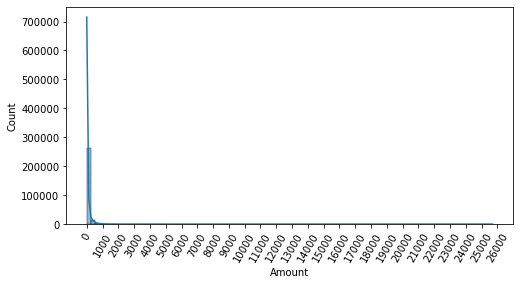

In [12]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

Amount를 표준 정규 분포 형태로 변환한 뒤에 로지스틱 회귀의 예측 성능을 측정해 보겠다.  
이를 위해 앞에서 만든 get_processed_df() 함수를 다음과 같이 사이킷런의 StandardScaler 클래스를 이용해 Amount 피처를 정규 분포 형태로  
변환하는 코드로 변경한다.

In [14]:
from sklearn.preprocessing import StandardScaler

#사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    # 변환된 Amount를 Amount_scaler로 피처명 변경 후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaler', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

이제 로지스틱 회귀와 LightGBM 모델을 각각 학습/예측/평가해 보겠다.

In [16]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(m_estimators=1000, num_leaves=64, n_jobs = -1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
[LightGBM] [Warning] Unknown parameter: m_estimators
오차 행렬
[[85006   289]
 [   70    78]]
정확도: 0.9958, 정밀도: 0.2125, 재현율: 0.5270,    F1: 0.3029, AUC:0.7012


정규 분포 형태로 Amount 피처값을 변환한 후 테스트 데이터 세트에 적용한 로지스틱 회귀의 경우는 **정밀도와 재현울이 오히려 조금 저하**되었고,  
LightGBM의 경우는 **약간 정밀도와 재현울이 저하되었지만 큰 성능상의 변경은 없다.**  
<br>
이번엔 **로그 변환**을 수행해 보겠다.  
- 로그변환의 특징  
 - **데이터 분포도가 심하게 왜곡되어 있을 경우 적용하는 중요 기법 **  
 - 원래 값을 log 값으로 변환해 원래 큰 값을 상대적으로 작은 값으로 변환  -> 상당 수준의 분포도 왜곡 개선  

In [19]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 넘파이의 log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

이제 Amount 피처를 로그 변환한 후 다시 로지스틱 회귀와 LightGBM 모델을 적용한 후 예측 성능을 확인해 보겠다.

In [21]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
[LightGBM] [Warning] Unknown parameter: m_estimators
오차 행렬
[[85002   293]
 [   69    79]]
정확도: 0.9958, 정밀도: 0.2124, 재현율: 0.5338,    F1: 0.3038, AUC:0.6698


**로지스틱 회귀**의 경우 원본 데이터 대비 정밀도는 향상되었지만, 재현울은 저하되었다.  
**LightGBM**의 경우 재현율이 향상되었다.

### 이상치 데이터 제거 후 모델 학습/에측/평가  
이상치 데이터(Outlier) : 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터.  
**IQR(Inter Quantile Range)** : 이상치 찾는 방법 중 하나,사분위(Quantile) 값의 편차 이용, 흔히 박스 플롯 방식으로 시각화  
사분위 : 전체 데이터를 내림차순 정리 후, 이를 1/4씩으로 구간을 분할  
특징 : 보통 IQR에 1.5를 곱해서 생성된 범위를 이용해 최댓값과 최솟값을 결정한 뒤 최댓ㄱ밧을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주.  
 - 최댓값 가정 : Q3($\frac {3} 4$) + (IQR * 1.5)  
 - 최솟값 가정: Q1($\frac {1}4$) - (IQR * 1.5)

이제 **이상치 데이터를 IQR을 이용해 제거**해 보겠다.  
매우 많은 피처가 있을 경우 이들 중 결정값(=레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋다.

<AxesSubplot:>

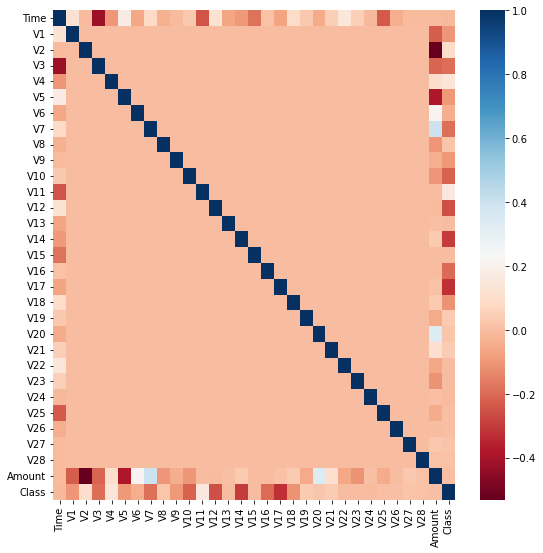

In [23]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

상관관계 히트맵에서 cmap을 'RdBu'로 설정  
 - **양의 상관관계**가 높을수록 색깔이 진한 파란색에 가까움  
 - **음의 상관관계**가 높을수록 색깔이 진한 빨간색에 가까움.  
 <br>
 음의 상관관계가 가장 높은 피처인 V14에 대해서만 이상치를 제거해 보겠다.  
 

In [37]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

get_outlier() 함수를 이용해 V14 칼럼에서 이상치 데이터를 찾아보겠다.

In [35]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


총 4개의 데이터인 8296, 8615, 9035, 9252번 index가 이상치로 추출됐다.  
<br>
이상치를 추출하고 이를 삭제하는 로직을 get_processed_df() 함수에 추가해 데이터를 가공한 뒤  
데이터 세트를 이용해 로지스틱 회귀와 LightGBM 모델을 다시 적용하겠다.

In [36]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
[LightGBM] [Warning] Unknown parameter: m_estimators
오차 행렬
[[85266    29]
 [   38   108]]
정확도: 0.9992, 정밀도: 0.7883, 재현율: 0.7397,    F1: 0.7633, AUC:0.9015


이상치 데이터를 제거한 뒤, 로지스틱 회귀와 LightGBM 모두 예측 성능이 크게 향상했다.

### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가  
이번에는 **SMOTE 기법**으로 오버 샘플링을 적용한 뒤 로지스틱 회귀와 LightGBM 모델의 예측 성능을 평가해 보겠다.  
SMOTE를 적용할 때는 **반드시 학습 데이터 세트만 오버 샘플링을 해야 한다.**  
검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에  
올바른 검증/테스트가 될 수 없다

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
##print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts()

ModuleNotFoundError: No module named 'imblearn'

이제 이렇게 생성된 학습 데이터 세트를 기반으로 먼저 로지스틱 회귀 모델을 학습한 뒤 성능을 평가해 보겠다.

In [43]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

NameError: name 'X_train_over' is not defined

**로지스틱 회귀 모델**의 경우 SMOTE로 오버 샘플링된 데이터로 학습할 경우 재현율이 92.47%로 크게 증가하지만,  
정밀도가 5.4%로 급격하게 저하된다.  
이는 로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터의 유형보다 너무나 많은 Class=1 데이터를 학습하면서  
실제 테스트 데이터 세트에서 예측을 지나치게 Class=1로 적용해 정밀도가 급격히 떨어지게 된 것이다.  
<br>
분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 통해 SMOTE로 학습된 로지스틱 회귀 모델에 어떠한 문제가 발생하고 있는지  
시각적으로 확인해 보겠다. 

In [44]:
recision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

NameError: name 'recision_recall_curve_plot' is not defined

임계값이 0.99 이하에서는 재현율이 매우 좋고 정밀도가 극단적으로 낮다가 0.99 이상에서는 반대로 된다.  
로지스틱 회귀 모델의 경우 SMOTE 적용 후 올바른 예측 모델이 생성되지 못했다.  
<br>
이번에는 LightGBM 모델을 SMOTE로 오버 샘플링된 데이터 세트로 학습/예측/평가를 수행하겠다.

In [45]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                    tgt_train=y_train_over, tgt_test=y_test)

NameError: name 'X_train_over' is not defined

재현율이 이상치만 제거한 경우인 82.88%보다 높은 84.93%가 되었다.  
그러나 정밀도는 이전의 96.03%보다 낮은 91.18%다.  
SMOTE를 적용하면 재현율은 높아지나 정밀도는 낮아지는 것이 일반적이다.  


## 스태킹 앙상블  
**스태킹**  
- 특징    
 - 여러 알고리즘을 서로 결합해 예측 결과를 도출(배깅,부스팅과 동일)  
 - 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행하는 방식(=메타 모델)  
<br>
- 종류  
 - 기반 모델
 - 최종 메타 모델  
<br>
- 쓰임 : 현실 모델에 적용하는 경우는 많지 않지만, 조금이라도 성능 수치를 높여야 할 경우 자주 사용됨.
   
[핵심] : 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용/테스트용 피처 데이터 세트를 만드는 것.

### 기본 스태킹 모델  
위스콘신 암 데이터 세트에 적용해 보겠다.

In [55]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [61]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression()

In [62]:
# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [65]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도 : 0.9211
랜덤 포레스트 정확도 : 0.9649
결정 트리 정확도 : 0.9035
에이다부스트 정확도 : 0.9561



p.299

개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값으로 만들어, 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용하겠다. 

In [68]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transform를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


이렇게 예측 데이터로 생성된 데이터 세트를 기반으로 최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도를 측정하겠다.

In [70]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.9737


개별 모델의 예측 데이터를 스태킹으로 재구성해 최종 메타 모델에서 학습하고 예측한 결과,  
정확도가 97.37%로 개별 모델 정확도보다 향상되었다.(무조건 좋다는 것은 아니다)  

### CV 세트 기반의 스태킹  
**CV 세트 기반의 스태킹**  
- 스텝 1 )과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용  
- 스텝 2 )개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤   
이를 기반으로 메타 모델이 학습/예측을 수행한다. 과정은 다음과 같다.  
 1) 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성.  
 2) 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐 메타 모델이 예측할 최종 테스트 데이터 세트 새성.  
<br>

먼저 스텝 1 부분을 코드로 구현하겠다. 개별 모델이 메타 모델을 위한 학습용 데이터와 테스트 데이터를 생성하는 것이다.
  

In [79]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

이제 여러 개의 분류 모델별로 stack_base_model() 함수를 수행합니다.

In [80]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


스텝 2를 구현해 보겠다.  
get_stacking_base_dataset() 호출로 반환된 각 모델별 학습 데이터와 테스트 데이터를 합치기만 하면 된다.

In [82]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


이렇게 만들어진 Stack_final_X_train은 메타 모델이 학습할 학습용 피처 데이터 세트다.  
그리고 Stack_final_X_test가 메타 모델이 예측할 테스트용 핓 데이터 세트다.  
<br>  
최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습한 후에  
스태킹된 테스트 데이터 세트로 예측하고, 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도를 측정해 보겠다.

In [83]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도 : 0.9737


최종 메타 모델의 예측 정확도는 약 98.25%로 측정됐다.